In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [6]:
#import the requests library
import requests
from datetime import datetime

#import the API key
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2e671e2b205101b6802253a635b48ef1


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    #log the uRL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #Add 1 to the record count
    record_count+=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = city_weather["dt"]
        
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | francisco beltrao
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hay river
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | dingle
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | chimoio
Processing Record 12 of Set 1 | marawi
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | broken hill
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | murgab
Processing Record 23 of Set 1 | 

Processing Record 39 of Set 4 | aguimes
Processing Record 40 of Set 4 | port hedland
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | salym
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | luganville
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | xinqing
Processing Record 47 of Set 4 | basar
Processing Record 48 of Set 4 | abnub
Processing Record 49 of Set 4 | pitimbu
Processing Record 50 of Set 4 | tahe
Processing Record 1 of Set 5 | seoul
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | comodoro rivadavia
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | mahibadhoo
Processing Record 7 of Set 5 | evensk
Processing Record 8 of Set 5 | yashkul
Processing Record 9 of Set 5 | whitianga
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | tchollire
Processing Record 12 of Set 5 | urshelskiy

Processing Record 30 of Set 8 | baruun-urt
Processing Record 31 of Set 8 | izhma
Processing Record 32 of Set 8 | skovorodino
Processing Record 33 of Set 8 | kuytun
Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | atbasar
Processing Record 36 of Set 8 | taksimo
Processing Record 37 of Set 8 | mattru
Processing Record 38 of Set 8 | djambala
Processing Record 39 of Set 8 | moron
Processing Record 40 of Set 8 | sorland
Processing Record 41 of Set 8 | pyapon
Processing Record 42 of Set 8 | gijon
Processing Record 43 of Set 8 | lugus
Processing Record 44 of Set 8 | krasnoarmeysk
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | hervey bay
Processing Record 47 of Set 8 | mae sot
Processing Record 48 of Set 8 | iqaluit
Processing Record 49 of Set 8 | aklavik
Processing Record 50 of Set 8 | sola
Processing Record 1 of Set 9 | pedasi
Processing Record 2 of Set 9 | hualmay
Processing Record 3 of Set 9 | jiuquan
Processing Record 4 of Set 9 |

Processing Record 17 of Set 12 | bulungu
Processing Record 18 of Set 12 | karratha
Processing Record 19 of Set 12 | basco
Processing Record 20 of Set 12 | eureka
Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | meadow lake
Processing Record 23 of Set 12 | ayagoz
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | toamasina
Processing Record 26 of Set 12 | manturovo
Processing Record 27 of Set 12 | ratnagiri
Processing Record 28 of Set 12 | lompoc
Processing Record 29 of Set 12 | college
Processing Record 30 of Set 12 | tevaitoa
Processing Record 31 of Set 12 | varzea da palma
Processing Record 32 of Set 12 | farafangana
Processing Record 33 of Set 12 | samoded
Processing Record 34 of Set 12 | mehamn
Processing Record 35 of Set 12 | batagay-alyta
Processing Record 36 of Set 12 | grindavik
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
# Convert array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,77.00,69,16,18.41,AU,1616636796
1,hobart,-42.8794,147.3294,64.99,82,75,12.66,AU,1616636514
2,francisco beltrao,-26.0811,-53.0550,66.25,95,100,3.38,BR,1616636563
3,punta arenas,-53.1500,-70.9167,46.40,76,75,8.05,CL,1616636796
4,hay river,60.8156,-115.7999,-4.00,65,75,3.44,CA,1616636797
5,lavrentiya,65.5833,-171.0000,17.10,89,87,3.31,RU,1616636797
6,dingle,10.9995,122.6711,84.85,69,100,15.88,PH,1616636797
7,ushuaia,-54.8000,-68.3000,42.80,75,20,28.77,AR,1616636798
8,albany,42.6001,-73.9662,52.00,83,100,4.00,US,1616636798
9,thompson,55.7435,-97.8558,10.40,48,75,8.05,CA,1616636799


In [10]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,carnarvon,AU,1616636796,-24.8667,113.6333,77.00,69,16,18.41
1,hobart,AU,1616636514,-42.8794,147.3294,64.99,82,75,12.66
2,francisco beltrao,BR,1616636563,-26.0811,-53.0550,66.25,95,100,3.38
3,punta arenas,CL,1616636796,-53.1500,-70.9167,46.40,76,75,8.05
4,hay river,CA,1616636797,60.8156,-115.7999,-4.00,65,75,3.44
5,lavrentiya,RU,1616636797,65.5833,-171.0000,17.10,89,87,3.31
6,dingle,PH,1616636797,10.9995,122.6711,84.85,69,100,15.88
7,ushuaia,AR,1616636798,-54.8000,-68.3000,42.80,75,20,28.77
8,albany,US,1616636798,42.6001,-73.9662,52.00,83,100,4.00
9,thompson,CA,1616636799,55.7435,-97.8558,10.40,48,75,8.05


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

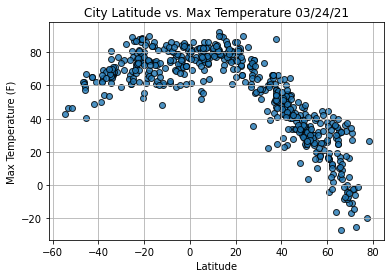

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

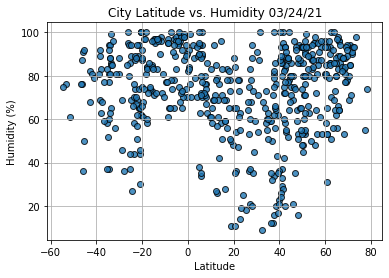

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

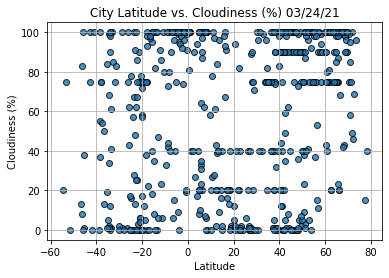

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

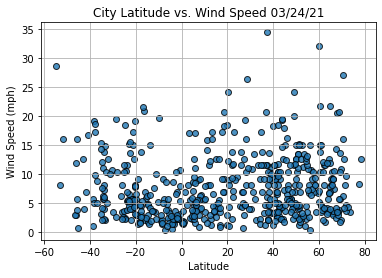

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City            hermanus
Country               ZA
Date          1616636800
Lat             -34.4187
Lng              19.2345
Max Temp              68
Humidity              81
Cloudiness             1
Wind Speed         11.01
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
541    False
542     True
543     True
544     True
545     True
Name: Lat, Length: 546, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,hay river,CA,1616636797,60.8156,-115.7999,-4.00,65,75,3.44
5,lavrentiya,RU,1616636797,65.5833,-171.0000,17.10,89,87,3.31
6,dingle,PH,1616636797,10.9995,122.6711,84.85,69,100,15.88
8,albany,US,1616636798,42.6001,-73.9662,52.00,83,100,4.00
9,thompson,CA,1616636799,55.7435,-97.8558,10.40,48,75,8.05


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

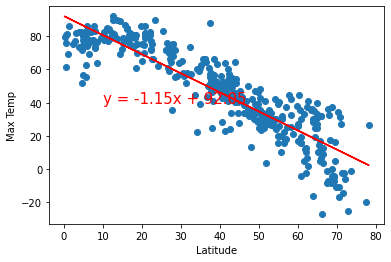

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                       for Maximum Temperature', 'Max Temp',(10,40))

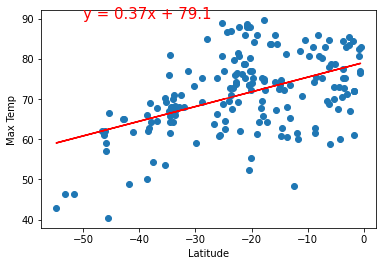

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

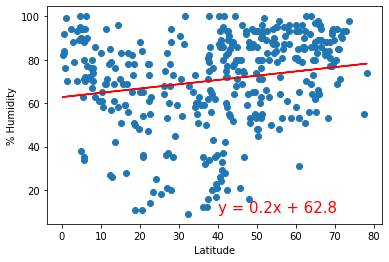

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

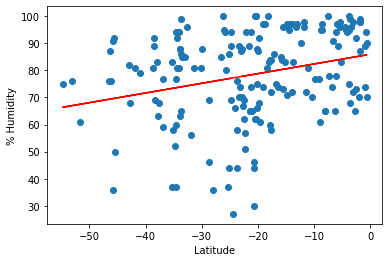

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

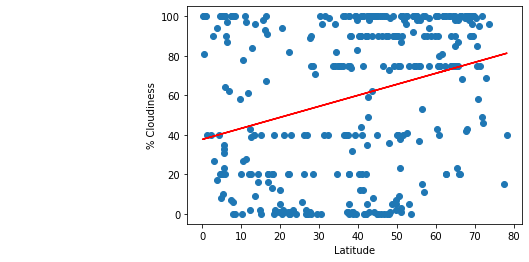

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

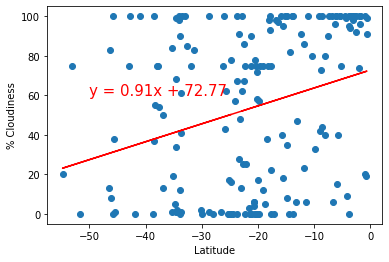

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

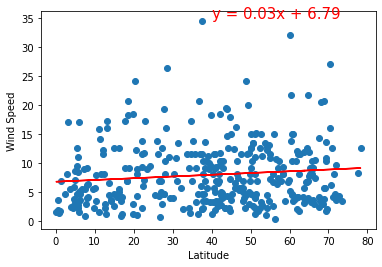

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

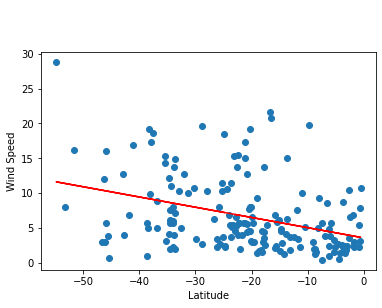

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))